# What we are going to cover:
- vision dataset to work with using `torchvision.datasets`
- Architecture of `Convolutional Neural Network` with PyTorch.
- Multi Class Image Classification problem.
- Modeling with CNNs in PyTorch.
  - Creating CNN with PyTorch.
  - Picking a loss and optimizer.
  - Training a model.
  - Evaluating a model.


* Computer Vision libraries:
  - `torchvision`> Base domain library for PyTorch Computer Vision.
  - `torchvision.datasets` > Get datasets and data loading functions for computer vision.
  - `torchvision.models`> Get pretrained computer vision models that you can leverage for your own problems.
  - `torchvision.transforms` > Functions for manipulating image datasets to be ssuitable for use with an ML model.
  - `torch.utils.data.Dataset` > Base dataset class for PyTorch.
  -  `torch.utils.data.DataLoader` > Creates a Python iterable over a dataset.

# Import Libraries.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Check versions.
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Getting dataset ready.

In [ ]:
# Setup training data.
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True, # Do we want the training dataset?
    download=True, # Do we want to download the images?
    transform=torchvision.transforms.ToTensor(), # How do we want to transform the data.
    target_transform = None) #How do we transform the labels.

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 17986819.08it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 299168.87it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5481390.93it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5338016.56it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[3]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.1294, 0.3765, 0.6863, 0.6118, 0.2510, 0.0549, 0.2118, 0.5373,
           0.8000, 0.7608, 0.4000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2863, 0.7294,
           0.6941, 0.7176, 0.6863, 0.7373, 0.9098, 1.0000, 0.8745, 0.8588,
           0.7608, 0.7020, 0.7294, 0.8353, 0.5725, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.6392, 0.5490,
           0.5882, 0.5961, 0.5882, 0.5725, 0.6863, 0.6863, 0.6784, 0.6706,
           0.6118, 0.5961, 0.5804, 0.5059, 0.6118, 0.5490, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5882, 0.5569, 0.5490,
           0.5961, 0.6275, 0.6118, 0.5725, 0.5569, 0.4980, 0.5294, 0.5216,
           0.5490, 0.5490, 0.5373, 0.5216, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
# Check shape of image.
print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image Label: Dress


## Visualize the data.

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

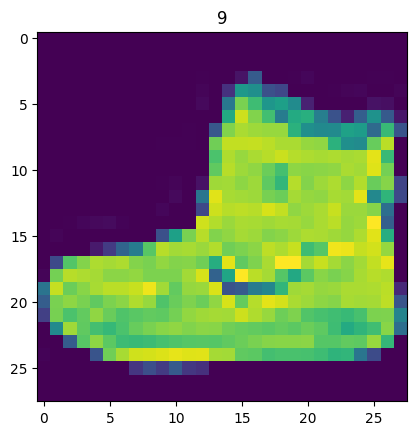

In [ ]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

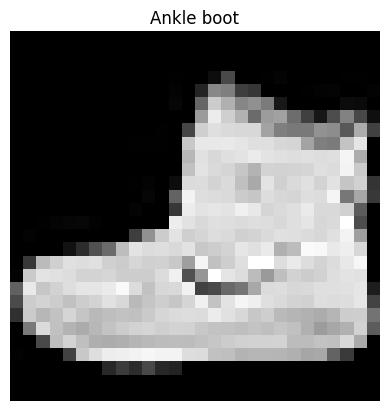

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

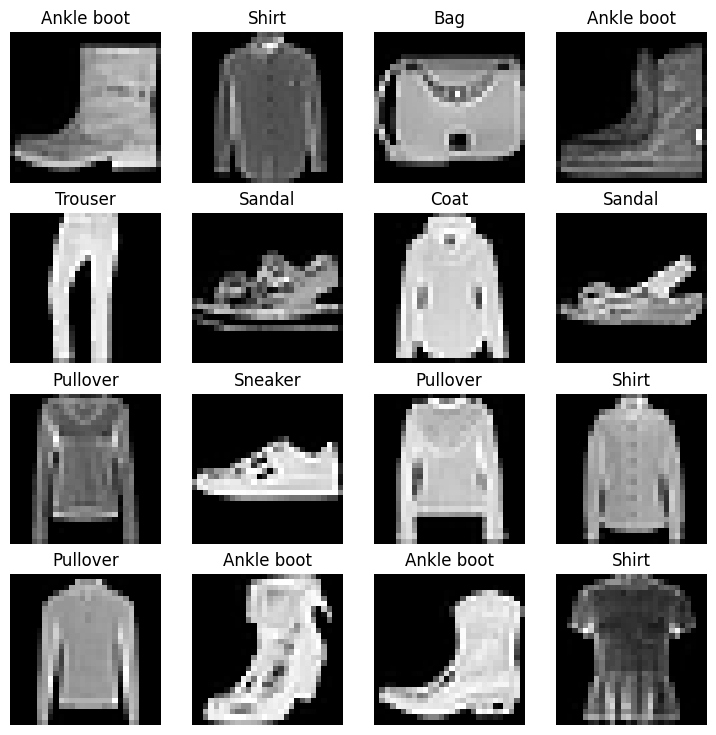

In [ ]:
# Plot more images.
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  # print(random_idx)
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Prepare DataLoader.
Now our data is in the form of PyTorch datasets.
DataLoader turns our dataset into a Python iterable.
More specifically, we want to turn our data into batches. Analyzing a huge number of images one by one takes a fair amount of memory and time. It would be better and convenient to break the datasets into group of batchs.

Why?
- More computationally efficient, as in, computing hardware may not be able to look(store in memory) at 6000 images in one hit. So we break it down to 32 images at each hit.

- It gives our neural network more chances to update it's gradient per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup batch_size hypeparameter.
BATCH_SIZE = 32

# Turn datasets into iterables.
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f252f619750>,
 <torch.utils.data.dataloader.DataLoader at 0x7f252f61baf0>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
# Check out what's inside the training dataloader.
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 8, Label Size: torch.Size([])


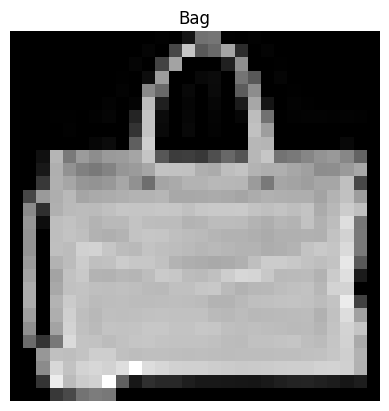

In [ ]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}, Label Size: {label.shape}")

# Building a model.

## Model 0: Buidling a baseline model.
When building a series of machine learning modelling experiments, it's best practice to start with a baseline. A baseline model is a simple model, which is used and improved upon with subsequent models/experiments.


In [ ]:
# Create a flatten layer.
flatten_model = nn.Flatten()

# Get a single sample.
x = train_features_batch[0]
x.shape

# Flatten the sample.
output = flatten_model(x) # Perform forward pass.

# Print what's happening.
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
# Creating instance of the model
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 784, # 28*28 = 784
    hidden_units = 10, # How many units in the hidden layer.
    output_shape = len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Loss function and Optimizer.

* Loss Function: As it is multiclass `nn.CrossEntropyLoss()`
* Optimizer: `torch.optim.SGD()`

Importing Helper functions.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo.
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Machine Learning is very experimental. We will often need to track some things like:
1. Model Performance.
2. How fast it runs.

Importing accuracy metric for performance.

In [ ]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

Importing timit module for knowing time.

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                end: float,
                device: torch.device = None):
  """
  Prints difference between start and end time.
  Demo:
  start_time = timer()
  Some Code...
  ............
  end_time = timer()
  print_train_time(start_time, end_time)
  """

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

# Creating a Training Loop and Training a model on batches of data.

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print what's happening.
5. Time it all.

In [ ]:
# Import tqdm for progress bar.
from tqdm.auto import tqdm

# Set the seed and start the timer.
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs.
epochs = 3

# Create training and test loop.
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches.
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. Do the forward pass.
    y_pred = model_0(X)

    # 2. Calculate the loss.
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the training loss.

    # 3. Optimizer zero grad.
    optimizer.zero_grad()

    # 4. Loss Backward.
    loss.backward()

    # 5. Optimizer step.
    optimizer.step()

    # Print what's happening.
    if batch%400 == 0:
      print(f"Looked at: {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader(Avg loss per epoch).
  train_loss /= len(train_dataloader)

  ### Testing.
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Do the forward pass.
      test_pred = model_0(X_test)
      # 2. Calculate the loss(accumulatively)
      test_loss += loss_fn(test_pred, y_test)
      # 3. Calculate the accuracy.
      test_acc += accuracy_fn(y_true = y_test,
                              y_pred = test_pred.argmax(dim=1))
    # Calculate the test loss average per batch.
    test_loss /= len(test_dataloader)
    # Calculate the accuracy average per batch.
    test_acc /= len(test_dataloader)

  # Print what's happening.
  print(f"\nTrain Loss: {train_loss:0.4f} | Test Loss: {test_loss:0.4f} | Test Accuracy: {test_acc:0.4f}")

# Calculate training time..
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train Loss: 0.5904 | Test Loss: 0.5095 | Test Accuracy: 82.0387
Epoch: 1
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train Loss: 0.4763 | Test Loss: 0.4799 | Test Accuracy: 83.1969
Epoch: 2
-------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train Loss: 0.4550 | Test Loss: 0.4766 | Test Accuracy: 83.4265
Train time on cpu: 35.631 seconds


# Make Predictions.

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data loader."""
  loss, acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch.
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_pred.argmax(dim=1))
    # Scale loss and acc to find the average loss/acc per batch.
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model_0 results on test dataset.
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# Experimentations on the model.

## Creating model_1 with non-linearity.

### Building model.

In [ ]:
# Creating a non-linear function.
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                         hidden_units=10,
                         output_shape=len(class_names)).to("cpu")

next(model_1.parameters()).device

device(type='cpu')

### Setup loss, optimizer, evaluation metrics.

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Functionizing training and testing loop.

Functionizing training step

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode.
  model.train()

  # Add a loop to loop through the training batches.
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # 1. Do the forward pass.
    y_pred = model(X)

    # 2. Calculate the loss.
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the training loss.
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred

    # 3. Optimizer zero grad.
    optimizer.zero_grad()

    # 4. Loss Backward.
    loss.backward()

    # 5. Optimizer step.
    optimizer.step()

  # Divide total train loss and accuracy  by length of train dataloader(Avg loss per epoch).
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  # Print what's happening.
  print(f"Train Loss: {train_loss:0.5f} | Train Accuracy: {train_acc:0.2f}")


Functionizing Testing step.

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):

  """Performs a testing loop step on model going over data_loader."""

  ### Testing.
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. Do the forward pass.
      test_pred = model(X)
      # 2. Calculate the loss(accumulatively)
      test_loss += loss_fn(test_pred, y)
      # 3. Calculate the accuracy.
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim=1))
    # Adjust metrics and print out.
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:0.5f} | Test Accuracy: {test_acc:0.2f}")

Building Training and Testing loop.

In [ ]:
torch.manual_seed(42)

# Measure Time.
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

# Set Epochs.
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 1.09199 | Train Accuracy: 61.34
Test Loss: 0.95636 | Test Accuracy: 65.00
Epoch: 1
-------
Train Loss: 0.78101 | Train Accuracy: 71.93
Test Loss: 0.72227 | Test Accuracy: 73.91
Epoch: 2
-------
Train Loss: 0.67027 | Train Accuracy: 75.94
Test Loss: 0.68500 | Test Accuracy: 75.02
Train time on cpu: 36.808 seconds


 `you want to improve the performance of your deep learning model. How might you approach such a task?`:
 https://horace.io/brrr_intro.html

In [ ]:
# Get model_1 results dictionary.
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

print(f"Performance of model_0(Non-linearity): \n{model_1_results}")

  0%|          | 0/313 [00:00<?, ?it/s]

Performance of model_0(Non-linearity): 
{'model_name': 'FashionMNISTModelV1', 'model_loss': 0.6850009560585022, 'model_acc': 75.01996805111821}


In [ ]:
print(f"Performance of model_0(Linearity): \n{model_0_results}")

Performance of model_0(Linearity): 
{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}


# Convolutional Neural Network.

CNN's are also known as ConvNets. Are known for their capabilities to find patterns in visual data.
**Architecture of CNN:**
`Input Data` -> `Input Layer` -> `Convolutional layer` - `Hidden activation/non-linear activation` -> `Pooling layer` -> `Output layer/linear layer` -> `Output activation`

**How it works:** https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create a convolutional neural network.
class FashionMNISTModelV2(nn.Module):
  """Model architeccture that replicates the TinyVGG model from CNN explainer"""

  def __init__(self,
               input_shape:  int,
               hidden_units: int,
               output_shape: int,):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer.
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # There is a trick calculating this.
                  out_features=output_shape)
    )
  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"After passing block 1:{x.shape}")
    x = self.conv_block_2(x)
    # print(f"After passing block 1:{x.shape}")
    x = self.classifier(x)
    return x

In [ ]:
# Create an instance of the class.
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Stepping through `nn.Conv2d`

In [ ]:
# Creating dummy data.
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)
# Create a single Conv2d layer.
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer.
conv_output = conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape
# conv_output

torch.Size([1, 10, 62, 62])

### Stepping through `maxpool2d`

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without unsqueeze dimension.
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d().
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer.
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer.
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


## Training CNN.

### Setup loss and optimizer.

In [ ]:
# Setup loss function/eval metrics/ optimizer.
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


### Training and Testing `model_2` using train_step and test_step functions.

In [ ]:
torch.manual_seed(42)

# Measure time.
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model.
epochs = 3
print(f"Initializing training....")
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  ### Training.
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  ### Testing.
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

print(f"Training successfully completed....")
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

Initializing training....


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 0.59518 | Train Accuracy: 78.38
Test Loss: 0.39500 | Test Accuracy: 85.99
Epoch: 1
-------
Train Loss: 0.36536 | Train Accuracy: 86.90
Test Loss: 0.35244 | Test Accuracy: 86.91
Epoch: 2
-------
Train Loss: 0.32588 | Train Accuracy: 88.13
Test Loss: 0.32719 | Test Accuracy: 88.07
Training successfully completed....
Train time on cpu: 180.786 seconds


### Get model_2 results.

In [ ]:
model_2_results = eval_model(model=model_2,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

# Comparing model results and training time.

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                            model_1_results,
                            model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [ ]:
# Add Training time to results comparision.
compare_results["traininf time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,traininf time
0,FashionMNISTModelV0,0.476639,83.426518,35.630539
1,FashionMNISTModelV1,0.685001,75.019968,36.807917
2,FashionMNISTModelV2,0.327190,88.069089,180.785539


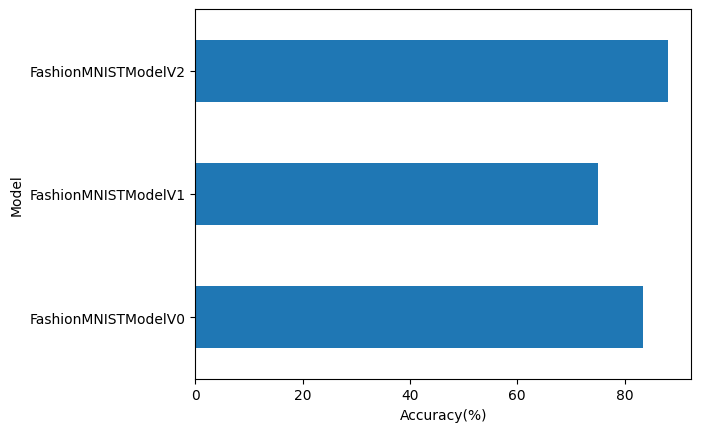

In [ ]:
# Visualize model results.
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accuracy(%)")
plt.ylabel("Model");

# Make and evaluate random predicions with best model.

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)
      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      # Get pred_labels.
      pred_probs.append(pred_prob.cpu())

  # Stac the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape.
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

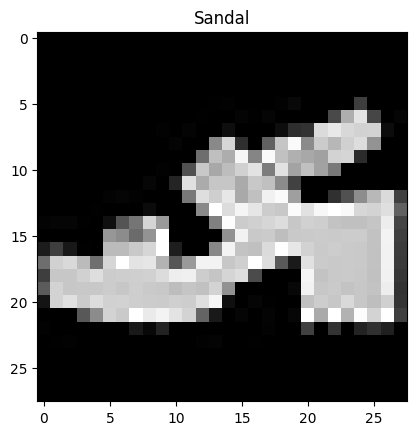

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions.
pred_probs = make_predictions(model=model_2,
                            data=test_samples)

# View first two prediction probabilites.
pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [ ]:
# Convert pred_probs to labels.
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

# Plot predictions

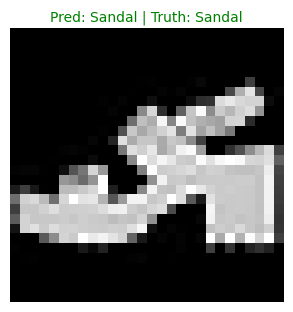

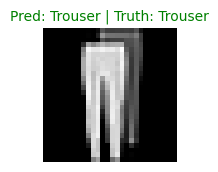

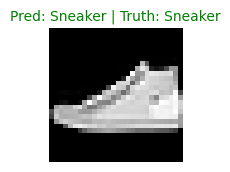

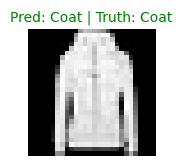

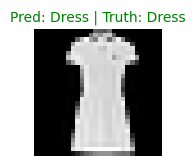

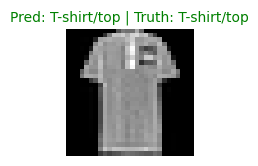

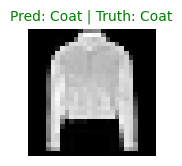

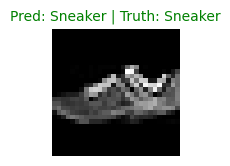

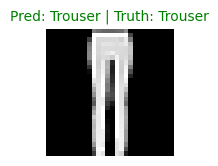

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot.
  plt.subplot(nrows, ncols, i+1)
  # Plot the target image.
  plt.imshow(sample.squeeze(), cmap="gray")
  # Find the prediction label(in text form)
  pred_label = class_names[pred_classes[i]]
  # Get the truth label(in text form)
  truth_label = class_names[test_labels[i]]
  # Create a title for the plot.
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  # Check for equality between pred
  if pred_label == truth_label:
    color = "green"
  else:
    color = "red"
  # Change the color of the title text.
  plt.title
  plt.title(title_text, fontsize=10, color=color)
  plt.axis(False);
  plt.tight_layout()
  plt.show()

# Making a confusion matrix for further prediction evaluation.

A way of evaluatig classification models visually.
1. Make predictions with trained model on the test dataset.
2. Make confusion matrix `torchmetircs.ConfusionMatrix`
3. Plot the confusion matrix using `mlextend.plotting.plot.confusion_matrix`

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# Make predictions with trained model.
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions.."):
    # Send data and targets to target device.
    X, y = X.to(device), y.to(device)
    # Dot the forward pass.
    y_logit = model_2(X)
    # Truth predictions from logits -> prediction probabilities -> prediction labels.
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation.
    y_preds.append(y_pred.cpu())

  print("Done making prediction....")
  # Conatenate list of predictions into tensor.
  # print(y_preds)
  y_preds_tensor = torch.cat(y_preds)
  y_preds_tensor[:10]

Making Predictions..:   0%|          | 0/313 [00:00<?, ?it/s]

Done making prediction....


In [ ]:
# See required packages are installed and if not, install
try:
  import torchmetrics, mlxtend
  print(f"mlxtend: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylin

In [ ]:
print(mlxtend.__version__)

0.23.1


Plotting confusion matrix.

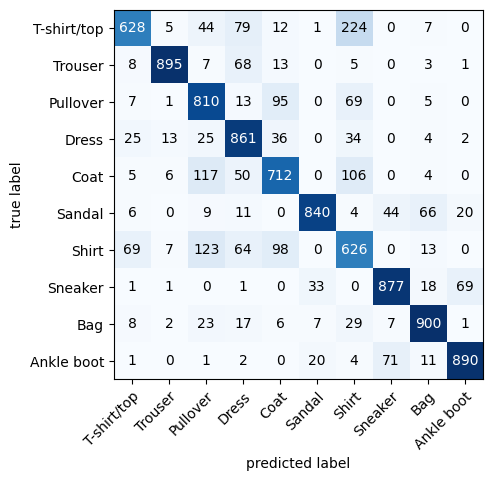

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance.
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

# Plot the confusion matrix.
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), #matplot likes working with
    class_names=class_names,
    # fig_size=(10,7)
)

# Saving and Loading model.

In [ ]:
from pathlib import Path

# Create model directory path.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path.
MODEL_NAME = "FashionMNIST_CV1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/FashionMNIST_CV1.pth')

In [ ]:
# Save the model state dict.
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/FashionMNIST_CV1.pth


In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3127,  0.3911, -0.4196],
                        [ 0.1556,  0.1815,  0.0878],
                        [-0.4420,  0.1430,  0.3166]]],
              
              
                      [[[-0.3738,  0.4791, -0.1338],
                        [ 0.2597,  0.4008,  0.0667],
                        [-0.1557,  0.3132,  0.0871]]],
              
              
                      [[[-0.3652, -0.0339, -0.0384],
                        [-0.6494, -0.6025,  0.2116],
                        [-0.8162, -0.6622, -0.1217]]],
              
              
                      [[[-0.7466, -0.8917, -0.7278],
                        [ 0.2914, -0.5231,  0.2517],
                        [ 0.2942, -0.0444,  0.3574]]],
              
              
                      [[[ 0.0132,  0.3515, -0.1108],
                        [-0.2418,  0.2368, -0.2215],
                        [-0.0970,  0.3388,  0.1292]]],
              
              
      

In [ ]:
# Create new instance.
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load model state dict.
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to target device.
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Evaluate loaded model.
torch.manual_seed(42)
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

If we get discripancies between loaded_model and the built model. Then we should check the saved path and manual seeding

In [ ]:
# Check if model results.
torch.isclose(torch.tensor(model_2_results["model_loss"]),
             torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02) # Tolerance level.

tensor(True)